# Aromatic cluster size distribution

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as mp
import numpy as np
from scipy.stats import norm
from scipy.stats import pareto
from scipy.integrate import simps
from scipy.optimize import minimize
from scipy.optimize import fmin_slsqp

## PAH data

### PAH BPCA yields

In [2]:
B2CA_2 = np.array([1.000, 0.000, 0.667, 1.000, 0.500, 0.400, 0.000, 0.500, 0.667, 0.500, 0.667, 0.000, 0.000, 0.200, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000]).T
B3CA_2 = np.array([0.000, 1.000, 0.000, 0.000, 0.000, 0.000, 0.500, 0.000, 0.000, 0.250, 0.000, 0.000, 0.800, 0.200, 0.333, 0.000, 0.000, 0.000, 0.080, 0.000, 0.000, 0.400, 0.125, 0.222, 0.300, 0.364, 0.417, 0.462, 0.286, 0.200, 0.125, 0.059, 0.000]).T
B4CA_2 = np.array([0.000, 0.000, 0.000, 0.000, 0.500, 0.600, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000]).T
B4CA_3 = np.array([0.000, 0.000, 0.333, 0.000, 0.000, 0.000, 0.500, 0.500, 0.333, 0.000, 0.333, 0.857, 0.000, 0.400, 0.500, 0.429, 0.316, 0.250, 0.080, 0.200, 0.419, 0.400, 0.500, 0.333, 0.200, 0.091, 0.000, 0.000, 0.214, 0.267, 0.313, 0.353, 0.389]).T
B5CA = np.array([0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.250, 0.000, 0.000, 0.000, 0.200, 0.000, 0.286, 0.316, 0.333, 0.480, 0.333, 0.000, 0.200, 0.250, 0.222, 0.200, 0.182, 0.167, 0.000, 0.000, 0.067, 0.125, 0.176, 0.222]).T
B6CA = np.array([0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.143, 0.200, 0.000, 0.167, 0.286, 0.368, 0.417, 0.360, 0.467, 0.581, 0.000, 0.125, 0.222, 0.300, 0.364, 0.417, 0.538, 0.500, 0.467, 0.438, 0.412, 0.389]).T

### Total number of carbons per PAH

In [3]:
t  = np.array([13, 13, 14, 14, 18, 22, 16, 18, 17, 20, 17, 24, 20, 20, 22, 42, 54, 66, 70, 80, 84, 19, 27, 30, 33, 36, 39, 42, 44, 46, 48, 50, 52]).T

### Total number of hydrogen per PAH

In [4]:
h= np.array([10, 10, 10, 10, 12, 14, 10, 12, 12, 12, 12, 12, 12, 12, 12, 16, 18, 20, 22, 22, 24, 12, 14, 18, 20, 22, 22, 24, 24, 26, 24, 24, 24]).T

## Input: Biochar data

### Experimental BPCA yields

In [5]:
B2CA_1_ex = float(input("Enter the value for B2CA-1: "))
B3CA_2_ex = float(input("Enter the value for B3CA-2: "))
B4CA_2_ex = float(input("Enter the value for B4CA-2: "))
B4CA_3_ex = float(input("Enter the value for B4CA-3: "))
B5CAex = float(input("Enter the value for B5CA: "))
B6CAex = float(input("Enter the value for B6CA: "))

Enter the value for B2CA-1:  0.0364
Enter the value for B3CA-2:  0.1105
Enter the value for B4CA-2:  0.0576
Enter the value for B4CA-3:  0.1421
Enter the value for B5CA:  0.3526
Enter the value for B6CA:  0.3008


### H/C ratio and temperature of pyrolysis

In [6]:
H_C=float(input("Enter the value for H/C ratio molar: "))

Enter the value for H/C ratio molar:  0.512


In [7]:
Biochar_Temp=float(input("Enter the temperature of pyrolysis in °C: "))

Enter the temperature of pyrolysis in °C:  500


### Aromatic and carboxyl carbon from NMR

In [9]:
Aromatic = float(input("Enter the value for Caro: "))
Carboxyl = float(input("Enter the value for Carboxyl: "))
Aliphatic = float(input("Enter the value for Aliphatic: "))

Enter the value for Caro:  0.6733
Enter the value for Carboxyl:  0.0333
Enter the value for Aliphatic:  0.0333


In [10]:
if Aliphatic >= 0.05: # To prevent an excess of aromatic carbon
    Aliphatic =0
m = (1 / (Aromatic + Carboxyl + Aliphatic)) * 1.2

## Create a Probability Density Distribution

Obtain the average cluster size ( μ ) using equation 18 presented in this paper and multiply the value by 2.3 for Temperature ≤ 500°C. Additionally, the value of μ should be in the vector t. Therefore, if you obtain a value, for example, μ=41, approximate it to 42 (as 42 is contained in the vector t). 
https://pubs.acs.org/doi/10.1021/ef00014a012

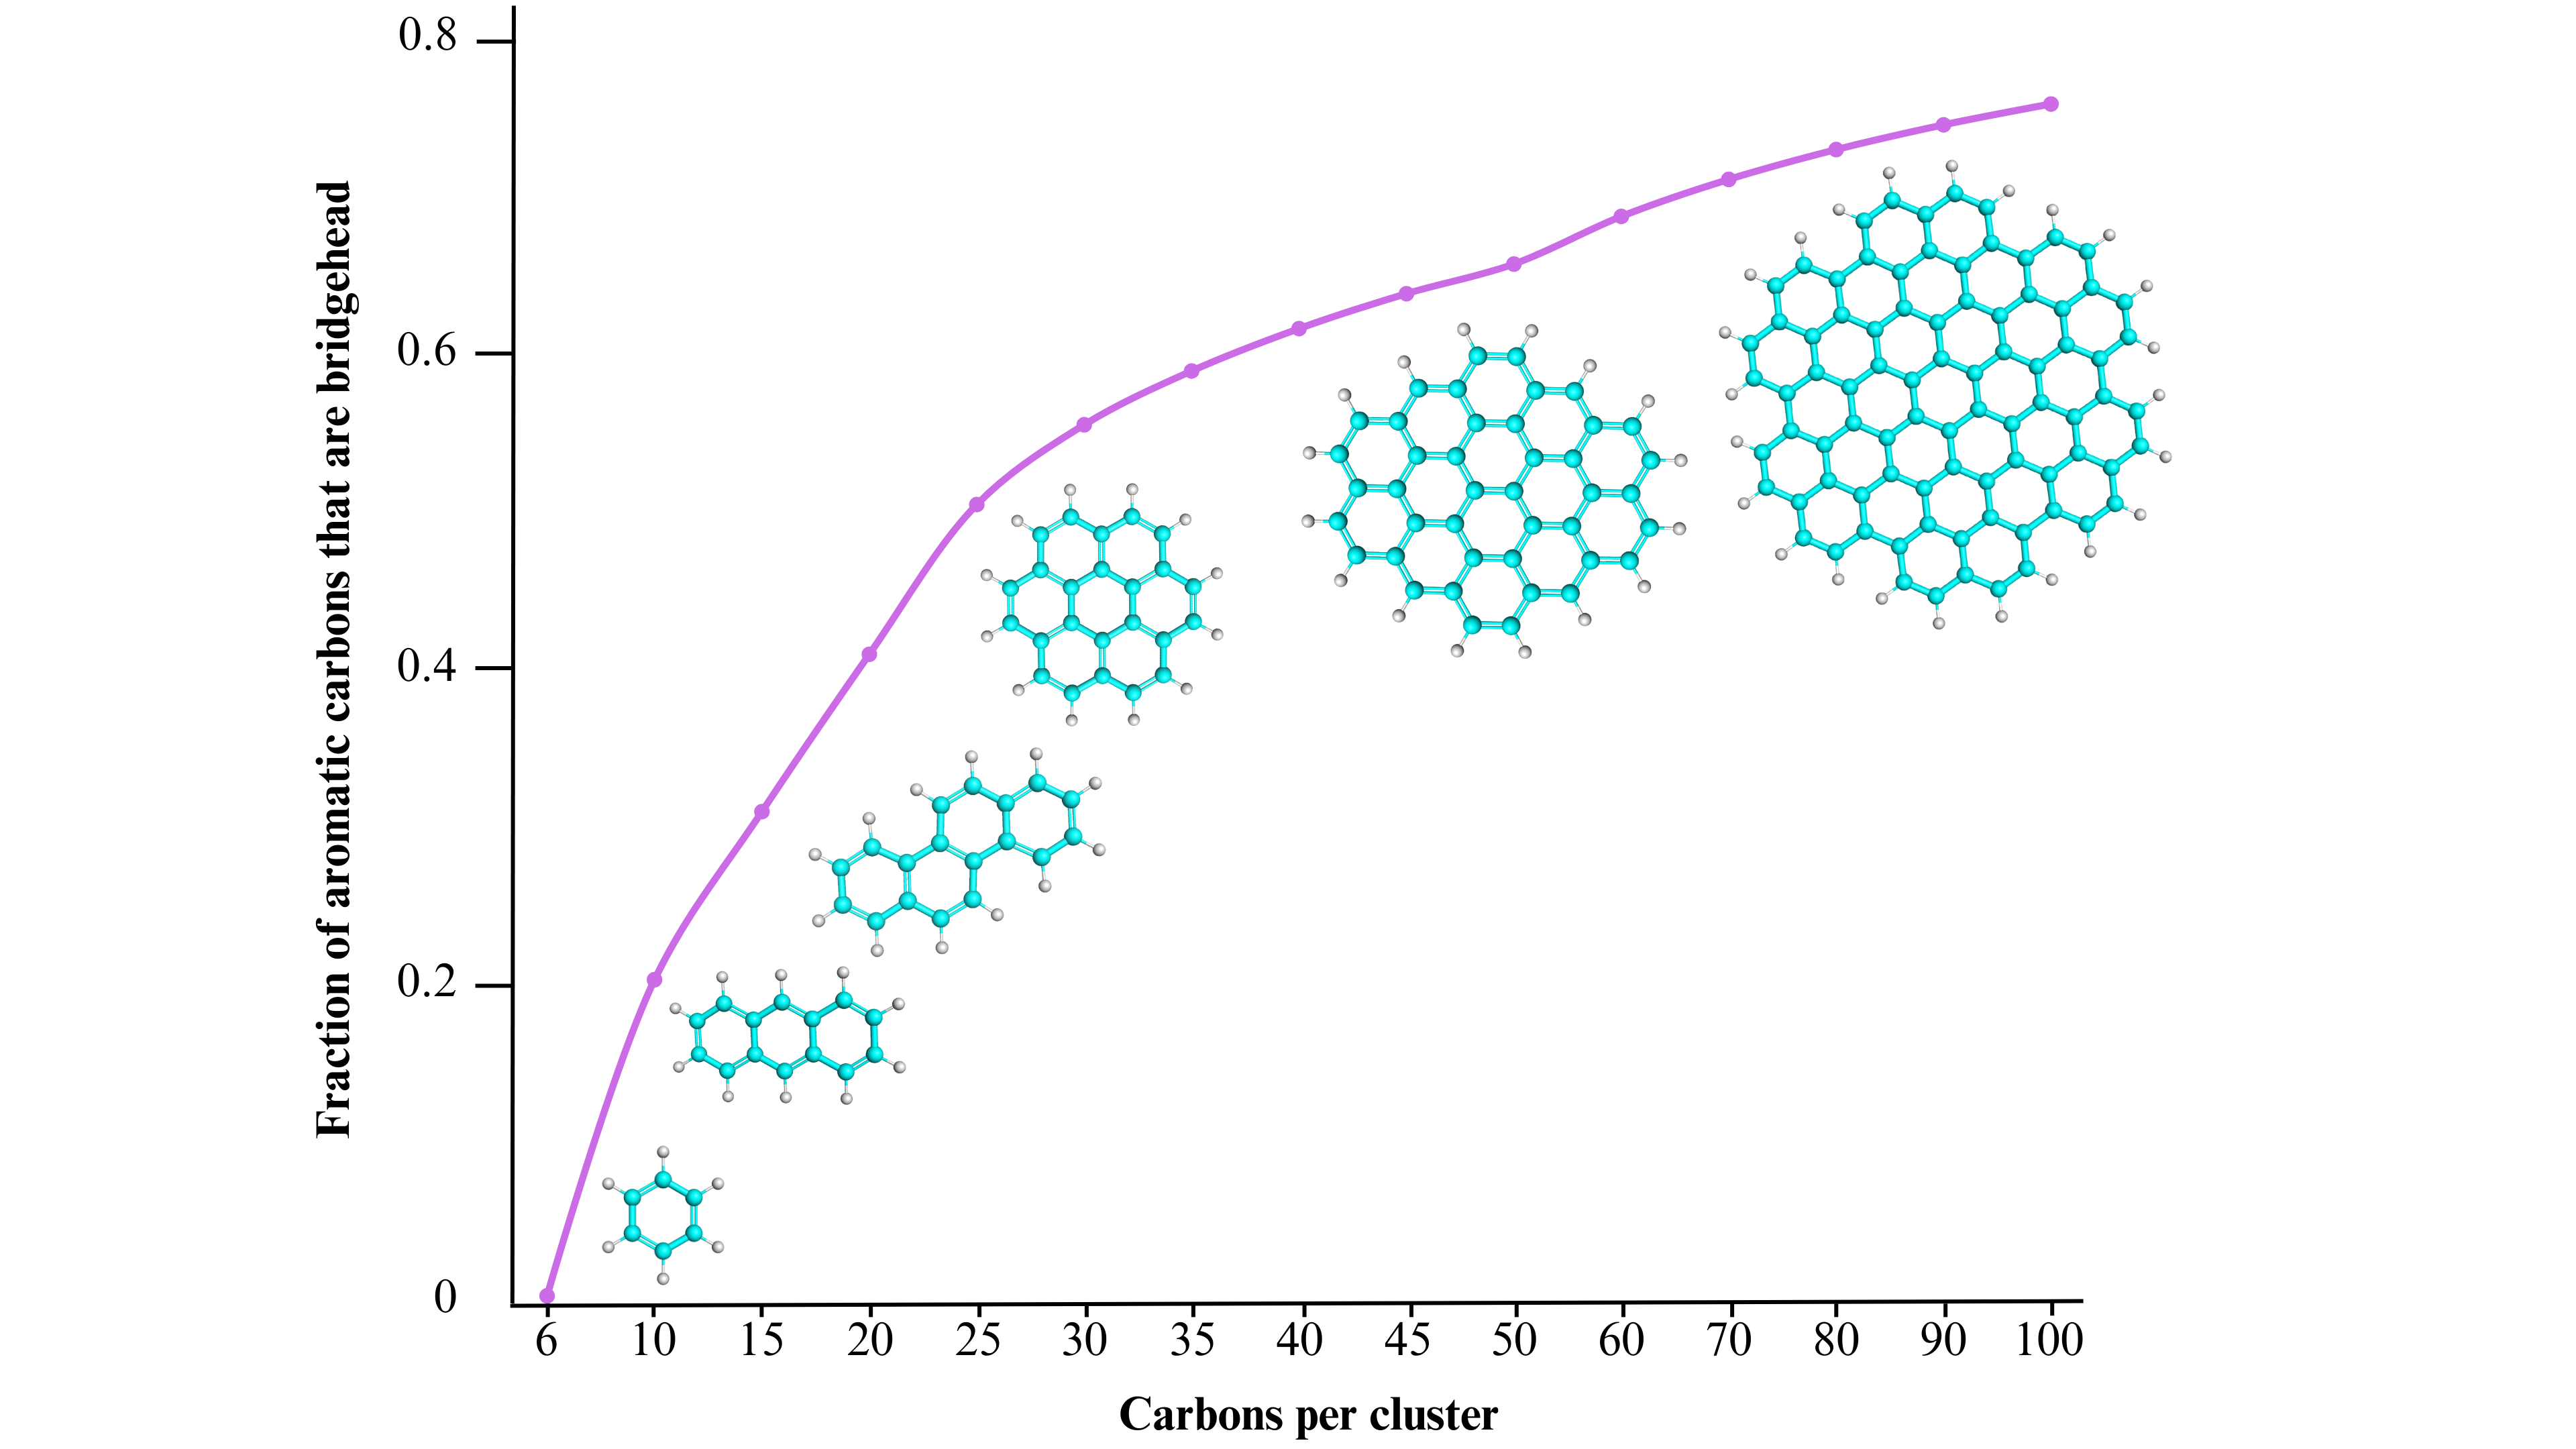

In [11]:
from IPython.display import Image, display
image_path = 'CS.png'
display(Image(filename=image_path))

In [12]:
mu = float(input("Enter the average cluster size (number of carbons): "))

Enter the average cluster size (number of carbons):  54


In [13]:
# Normalize the variables
carbons = t.T
sig = np.std(carbons)
carbons_centered = []
for i in range(len(carbons)):
    carbons_centeredval=(carbons[i]-mu)/sig
    carbons_centered.append(carbons_centeredval)

In [14]:
# Variables
carbons = t.T
# Probability Density Function
pdf = norm.pdf(carbons_centered, loc = 0 , scale = 1)
pdf = np.clip(pdf, 0, None)  # Clip PDF values to be non-negative

# Cumulative Distribution Function
cum=norm.cdf(carbons_centered, 0, 1)
cum = np.clip(cum, 0, 1)  # Clip CDF values between 0 and 1

In [15]:
probability = []

for i in range(len(cum)):
    if i==0:
        probability_val=cum[0]
        probability.append(probability_val)
    else:
        probability_val=abs(cum[i]-cum[i-1])
        probability.append(probability_val)
        
totalprob=sum(probability)

In [16]:
probabilityCorrected = []

for i in range(len(probability)):
    probability_value=probability[i]/totalprob
    probabilityCorrected.append(probability_value)

newprob=sum(probabilityCorrected)
print(round(newprob))  

1


## Define the size of the model

In [17]:
SizeModel = float(input("How many atoms do you want in the model?: "))

How many atoms do you want in the model?:  10000


In [18]:
Frequency = []
TotalCarbons = []

for i in range(len(t)):  
    Frequency_value = round(((SizeModel/m)/t[i])*probabilityCorrected[i])
    Frequency.append(Frequency_value)
    TotalCarbons_value=Frequency[i]*t[i]
    TotalCarbons.append(TotalCarbons_value) 
    
print(Frequency)
print("Total number of Carbons in the model:",sum(TotalCarbons))

[4, 0, 0, 0, 2, 2, 4, 1, 1, 2, 2, 4, 3, 0, 1, 14, 11, 9, 2, 4, 1, 122, 5, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2]
Total number of Carbons in the model: 6213


## Ecuations to solve

In [19]:
# Equations to solve BPCA

def calculateB2CA(Frequency):
    B2CAval = []
    for i in range(len(Frequency)):
        B2CAval.append(B2CA_2[i] * Frequency[i])
    return B2CAval

def calculateB3CA(Frequency):
    B3CAval = []
    for i in range(len(Frequency)):
        B3CAval.append(B3CA_2[i] * Frequency[i])
    return B3CAval

def calculateB4CA_2(Frequency):
    B4CA_2_val = []
    for i in range(len(Frequency)):
        B4CA_2_val.append(B4CA_2[i] * Frequency[i])
    return B4CA_2_val

def calculateB4CA_3(Frequency):
    B4CA_3_val = []
    for i in range(len(Frequency)):
        B4CA_3_val.append(B4CA_3[i] * Frequency[i])
    return B4CA_3_val

def calculateB5CA(Frequency):
    B5CAval = []
    for i in range(len(Frequency)):
        B5CAval.append(B5CA[i] * Frequency[i])
    return B5CAval

def calculateB6CA(Frequency):
    B6CAval = []
    for i in range(len(Frequency)):
        B6CAval.append(B6CA[i] * Frequency[i])
    return B6CAval

def calculatetotalC(Frequency):
    TotalC = []
    for i in range(len(Frequency)):
        TotalC.append(Frequency[i]*t[i])
    return TotalC

In [20]:
def objective_function(b, t, h):
    
    B2CAval = calculateB2CA(b)
    B3CAval = calculateB3CA(b)
    B4CA_2_val = calculateB4CA_2(b)
    B4CA_3_val = calculateB4CA_3(b)
    B5CAval = calculateB5CA(b)
    B6CAval = calculateB6CA(b)
    
    BPCA = np.sum(B2CAval) + np.sum(B3CAval) + np.sum(B4CA_2_val) + np.sum(B4CA_3_val) + np.sum(B5CAval) + np.sum(B6CAval)
    
    error_B2CA = np.abs(sum(B2CAval) / BPCA - B2CA_1_ex)
    error_B3CA = np.abs(sum(B3CAval) / BPCA - B3CA_2_ex)
    error_B4CA_2 = np.abs(sum(B4CA_2_val) / BPCA - B4CA_2_ex)
    error_B4CA_3 = np.abs(sum(B4CA_3_val) / BPCA - B4CA_3_ex)
    error_B5CA = np.abs(sum(B5CAval) / BPCA - B5CAex)
    error_B6CA = np.abs(sum(B6CAval) / BPCA - B6CAex)
        
    # Calculate the total error to minimize

    total_error = error_B2CA + error_B3CA  + error_B4CA_2 + error_B4CA_3  + error_B5CA  + error_B6CA 

    return total_error

# Define constraints: Bridgehead Carbon, Total Number of Carbons, and Cluster Size Average

def Constraint(b, t, h):

    sum_t = np.sum(t * b)
    sum_h = np.sum(h * b)
    bridgeheadC = H_C
    Ratio = sum_h / sum_t
    check = abs(bridgeheadC - Ratio)
    v = abs(H_C-(H_C*Aromatic)) 

    index_of_mean= np.where(t == mu)[0] 
    Mean_av = ((b[index_of_mean] * t[index_of_mean]).sum()) / sum_t if index_of_mean.size > 0 else 0.0
    
    if Biochar_Temp == 700 or Biochar_Temp == 600 or Biochar_Temp == 400:
        return [sum_t - (SizeModel / m), Mean_av - 0.10]
    else:
        return [check - v, sum_t - (SizeModel / m), Mean_av - 0.10]

# Initial guess for b (Frequency obtained from Gaussian Distribution)
initial_b = Frequency

t  = np.array([13, 13, 14, 14, 18, 22, 16, 18, 17, 20, 17, 24, 20, 20, 22, 42, 54, 66, 70, 80, 84, 19, 27, 30, 33, 36, 39, 42, 44, 46, 48, 50, 52]).T
h = np.array([10, 10, 10, 10, 12, 14, 10, 12, 12, 12, 12, 12, 12, 12, 12, 16, 18, 20, 22, 22, 24, 11, 14, 15, 17, 19, 21, 23, 22, 21, 21, 19, 18]).T


if SizeModel<=20000: 
    r=0 # Select this to be zero in case you want more precision about the BPCA yields, and 1 if you want more diversity of PAH
else:
    r=1 

if Biochar_Temp == 600 or Biochar_Temp == 700:
    g=0.009
else:
    g=0.01

result = fmin_slsqp(objective_function, initial_b, f_eqcons=Constraint, bounds=[(r, g*SizeModel)] * len(initial_b), disp=False, full_output=True, epsilon=1.4901161193847656e-8, args=(t, h), iter=10000, acc=1e-10)

Wopt, fW, its, imode, smode = result

scalars = [float(round(x)) for x in Wopt]

if imode != 0:
    print("Optimization failed: " + smode)
else:
    print(scalars)
print("Final value for the total error:",fW)
print("Number of iterations:",its)
%store result

[0.0, 3.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 11.0, 3.0, 62.0, 3.0, 0.0, 0.0, 7.0, 3.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0]
Final value for the total error: 0.002400000515004358
Number of iterations: 232
Stored 'result' (tuple)


## Store BPCA Distribution:

In [21]:
%store -r result
values=np.round(result[0]).astype(int)